In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
Beads_range=[x for x in range(10,50,4) if x not in (38,46)] # # # #    monomer's range
Dens_range=[x/100 for x in range(0,81,5) if x>0] # # # #    dens' range
Frac_range=[x/100 for x in range(0,100,25) if x!=0] # # # #    frac' range
Energies=['Total','Kinetic','Bonded','Non-Bonded','Pressure']

In [3]:
def Data(bead, frac, dens):
    file = pd.read_csv ('./frac_'+str(frac)+'/m_'+str(bead)+'/d_'+str(dens)+'/energy.csv')
    return file

In [4]:
def listCreater(Beads, Frac, Dens, Energy):
    data = [];
    for bead in Beads:
        temp = [];
        for dens in Dens:
            temp.append((Data(bead, Frac, dens)[str(Energy)].mean())/1000)
        data.append(temp)
    return data

In [5]:
def energyGraph(beads, fracs, dens, energies):
    
    fracs.reverse()
    
    for energy in energies:
        
        for frac in fracs:
            
            f=int((1-frac)*10%10)
            
            x = dens;
            
            y0=listCreater(beads, frac, dens, energy)[0]; plt.plot(x,y0,label='10 beads'); 
            y1=listCreater(beads, frac, dens, energy)[1]; plt.plot(x,y1,label='14 beads'); 
            y2=listCreater(beads, frac, dens, energy)[2]; plt.plot(x,y2,label='18 beads');
            y3=listCreater(beads, frac, dens, energy)[3]; plt.plot(x,y3,label='22 beads');
            y4=listCreater(beads, frac, dens, energy)[4]; plt.plot(x,y4,label='26 beads');
            y5=listCreater(beads, frac, dens, energy)[5]; plt.plot(x,y5,label='30 beads');
            y6=listCreater(beads, frac, dens, energy)[6]; plt.plot(x,y6,label='34 beads');
            y7=listCreater(beads, frac, dens, energy)[7]; plt.plot(x,y7,label='42 beads');  
            
            plt.xlabel("Density"); plt.ylabel(str(energy));
            plt.title("polymers with $f_{A}$ ~ "+str(f)+"");
            plt.legend(loc=0, ncol=2);
            plt.savefig("results/diagrams/f_"+str(f)+"/"+str(energy)+".png");
            plt.show()
            

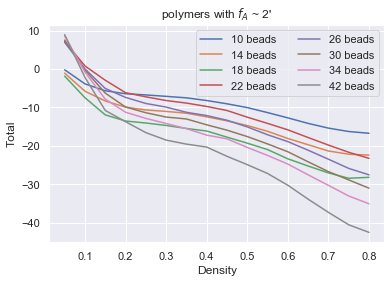

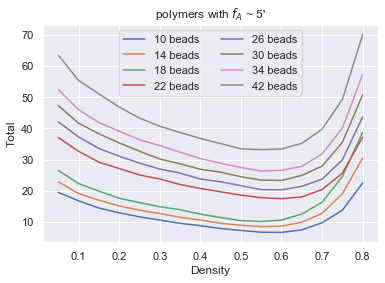

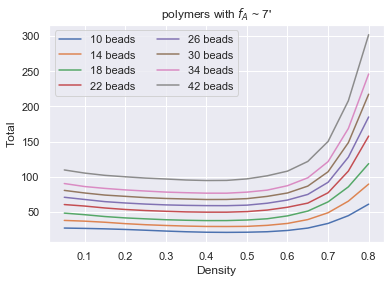

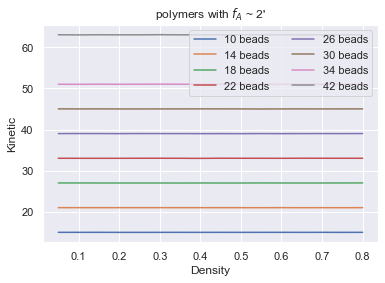

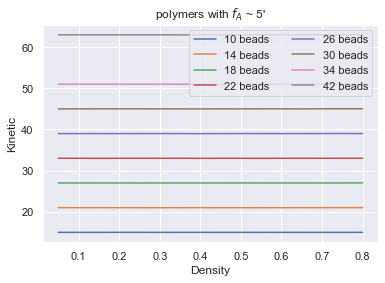

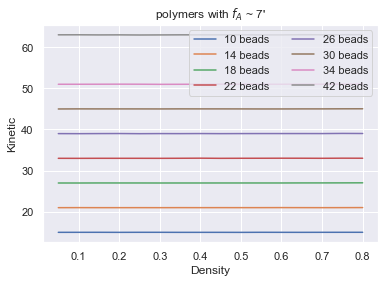

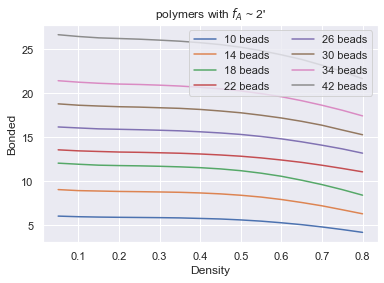

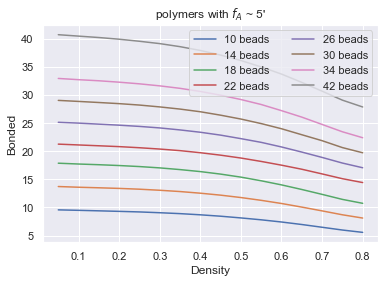

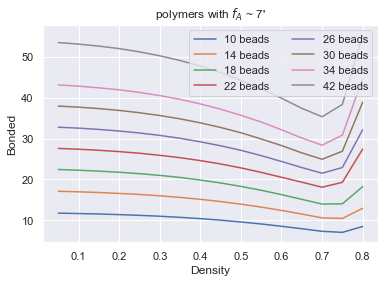

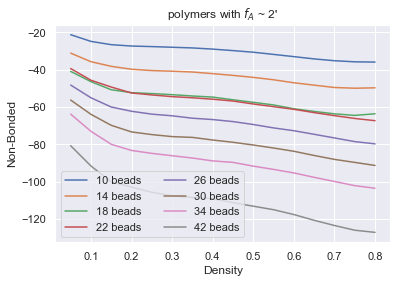

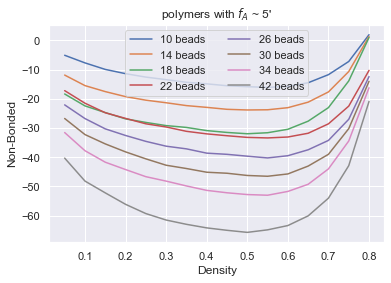

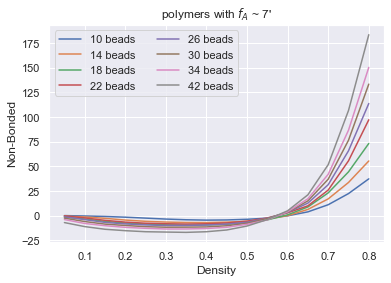

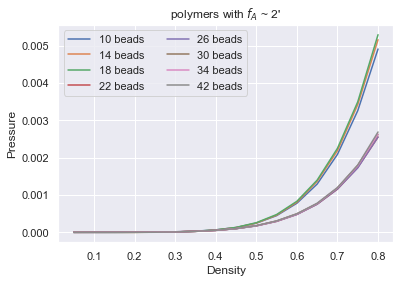

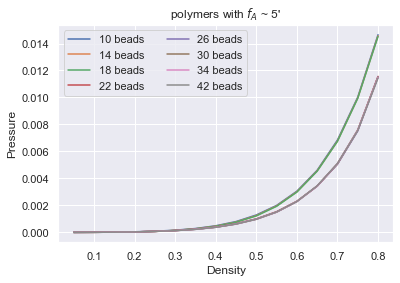

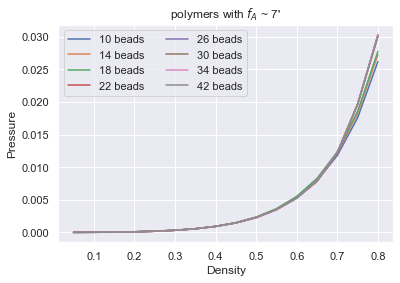

In [6]:
energyGraph(Beads_range, Frac_range, Dens_range, Energies)